<a href="https://colab.research.google.com/github/gitflai/DDS4/blob/main/Aula_12_DDS4_Pre_processamendo_de_Dados_e_Hipertunagem_de_Parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

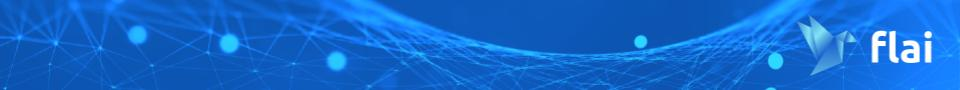

## **Aula 12 - DDS4 - Pré-processamendo de Dados e Tunagem de Hiperparâmetros**

---
## **Importação e Preparação dos Dados**

In [182]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/titanic_treino.csv'
dados = pd.read_csv(url)
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


                                             |          | [  0%]   00:00 -> (? left)


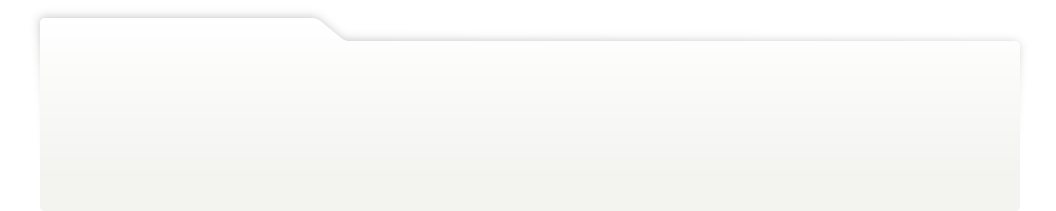
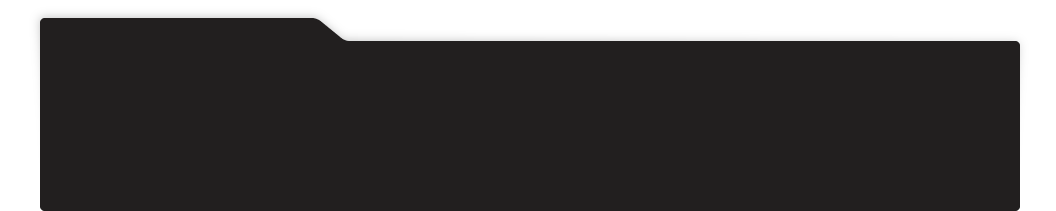
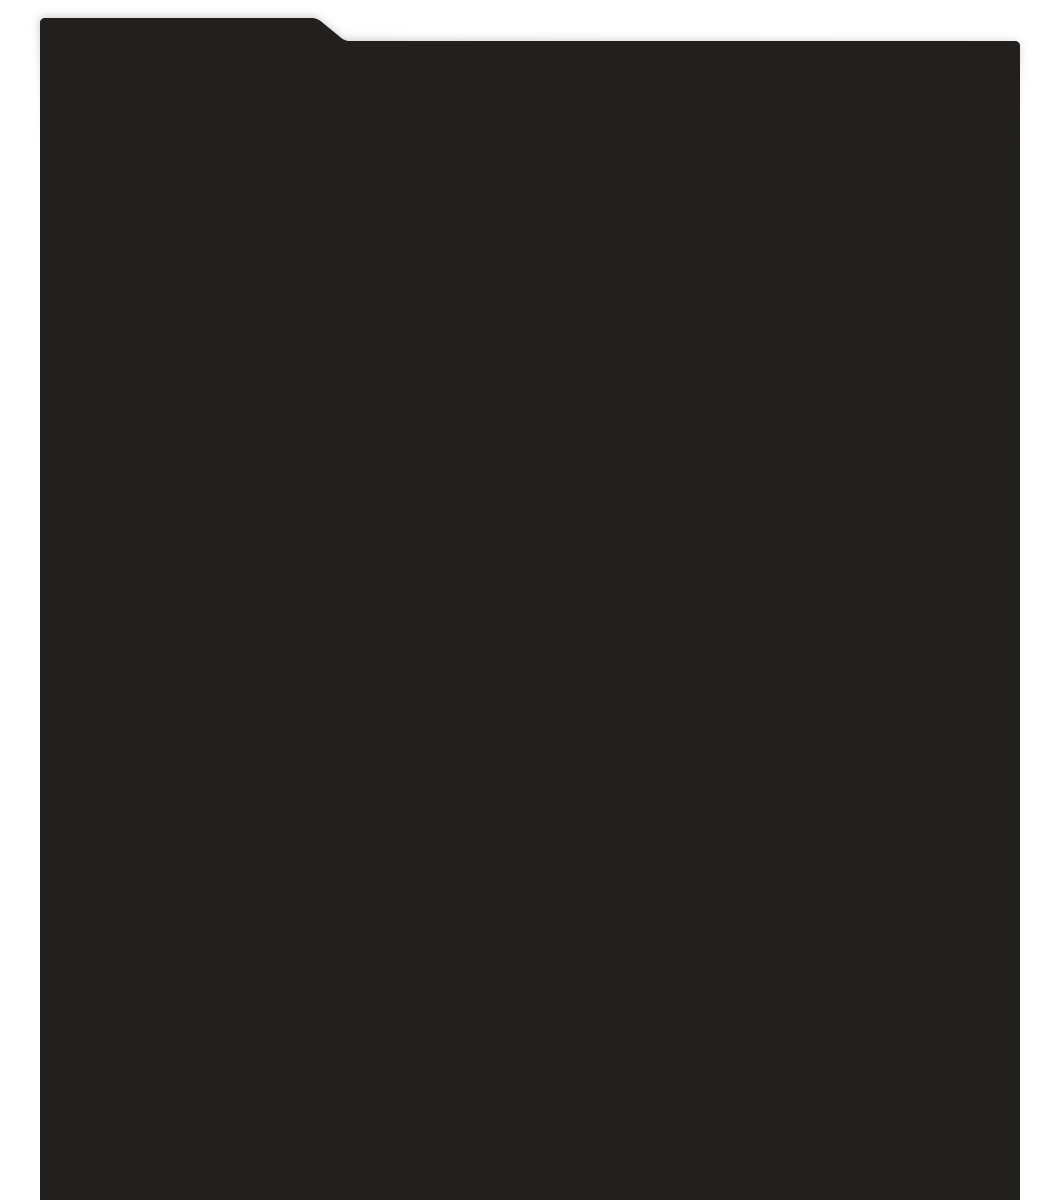
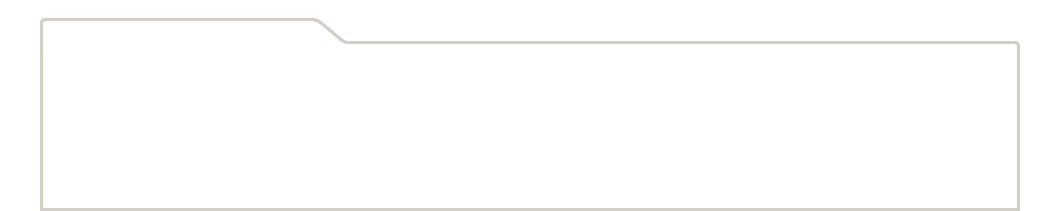
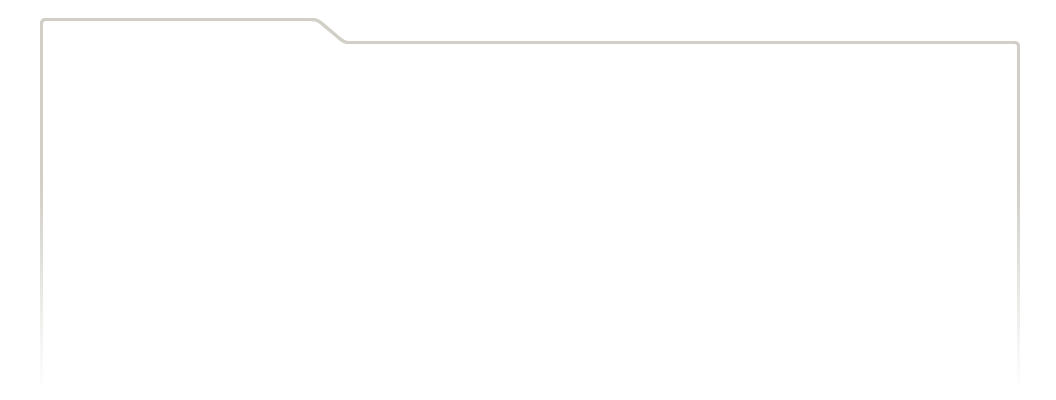
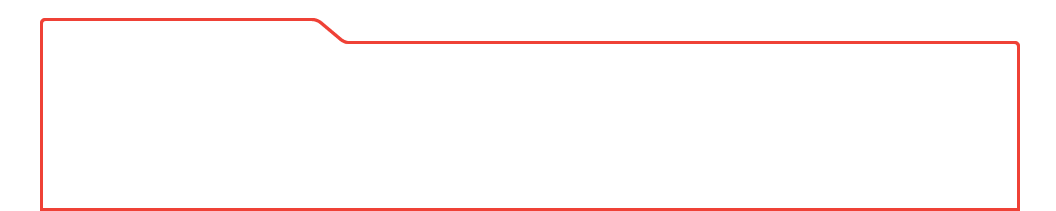
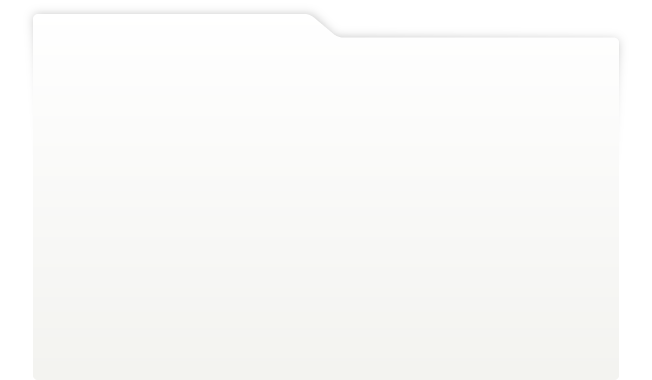
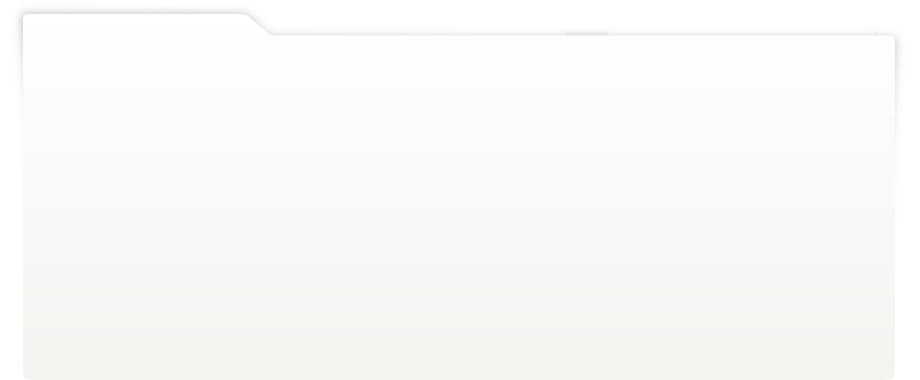
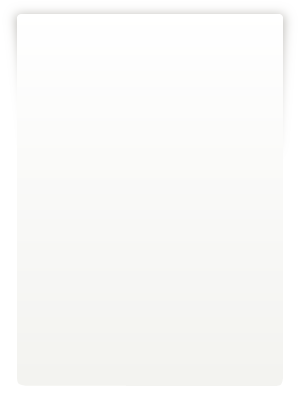
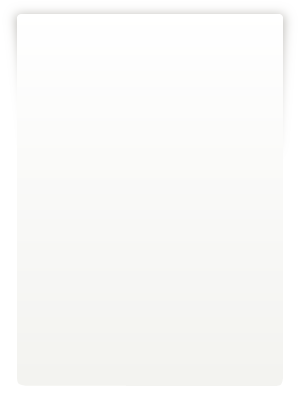
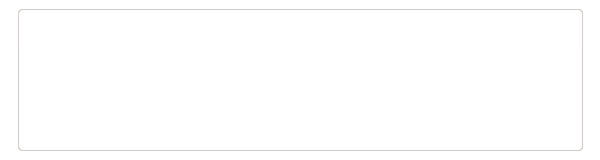
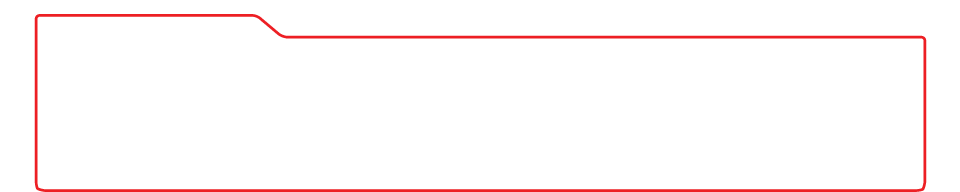
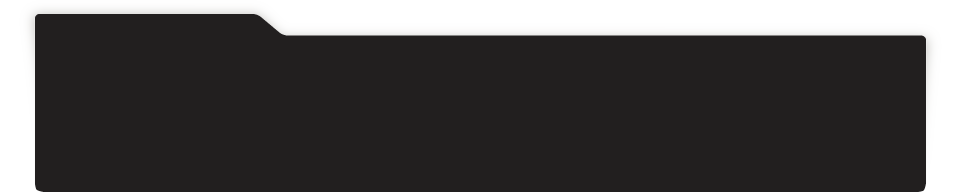
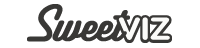
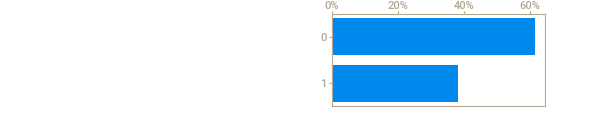
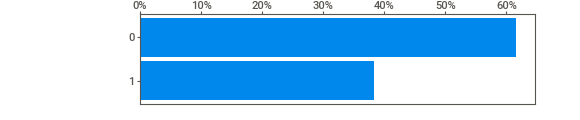
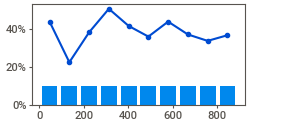
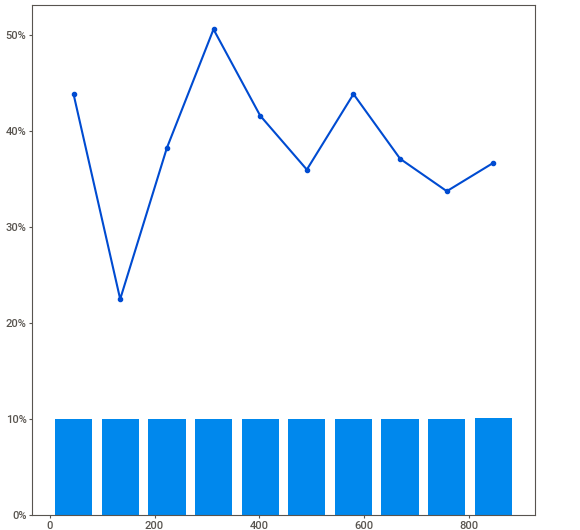
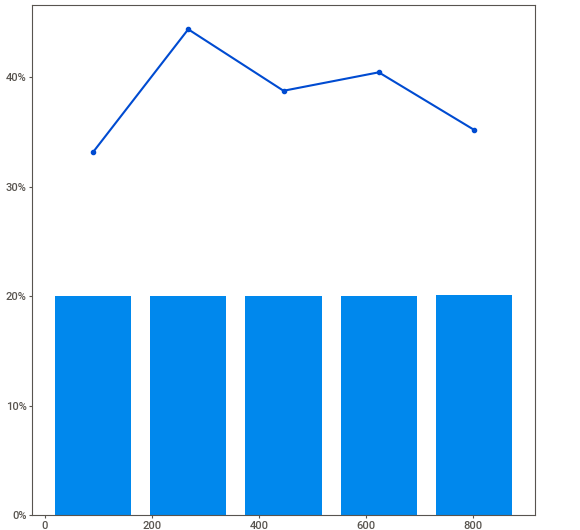
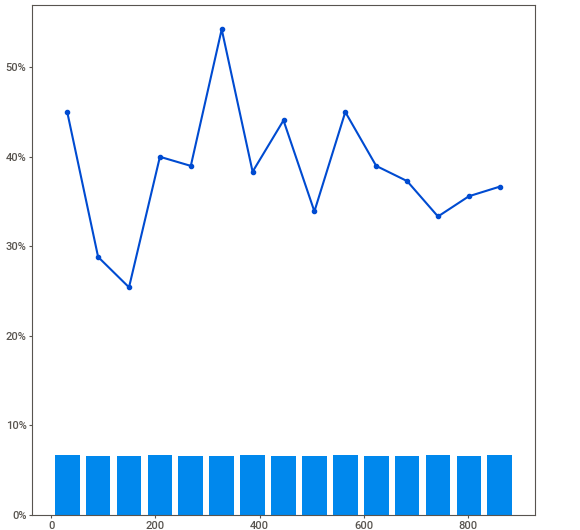
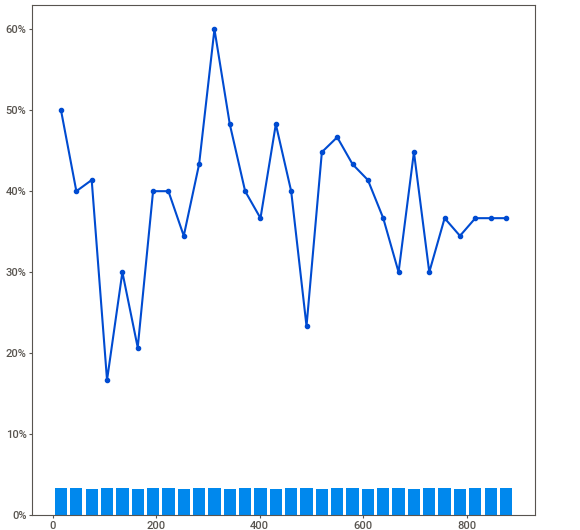
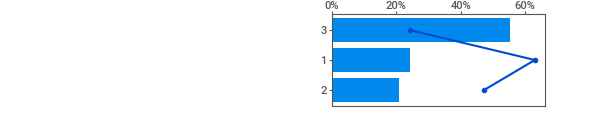
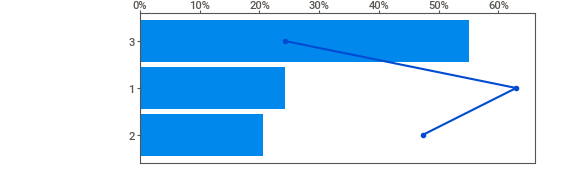
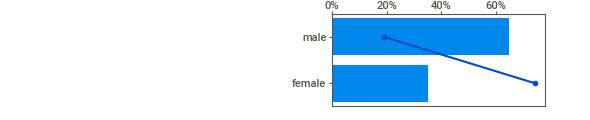
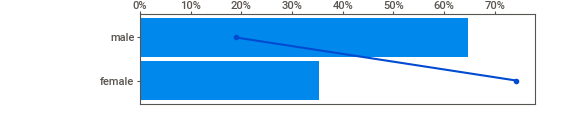
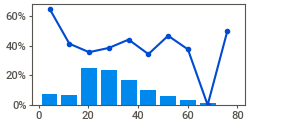
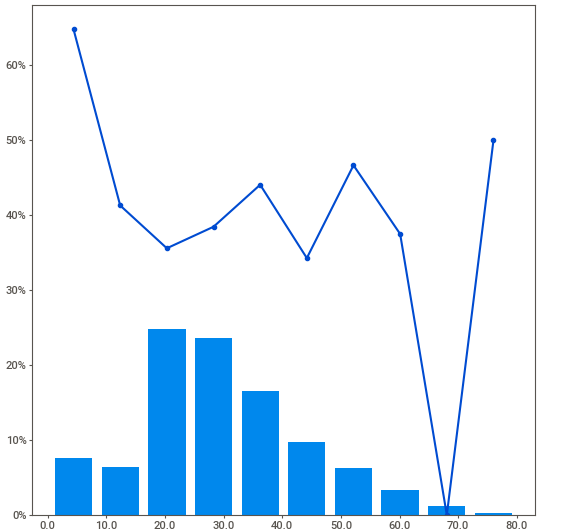
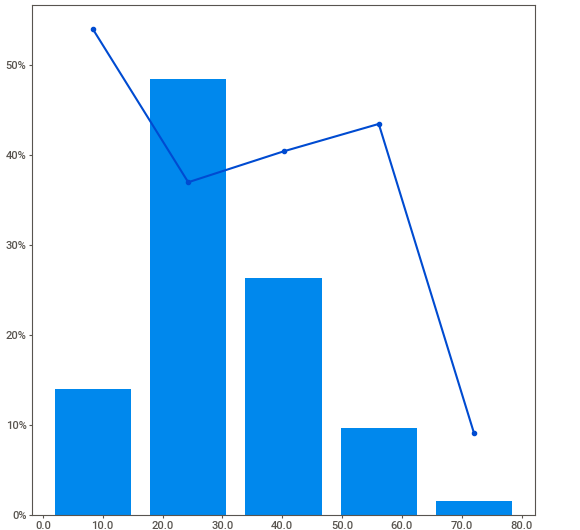
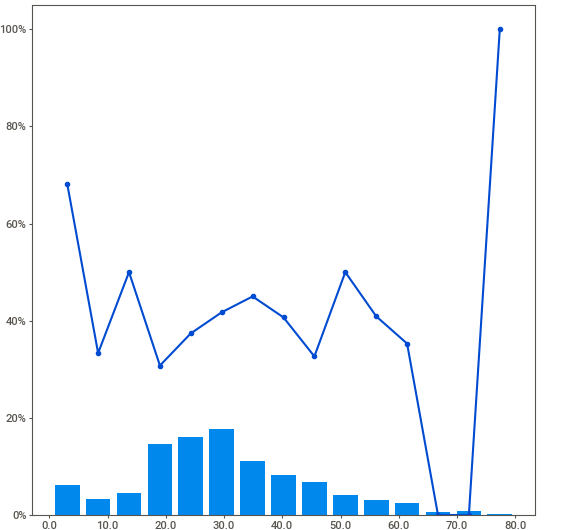
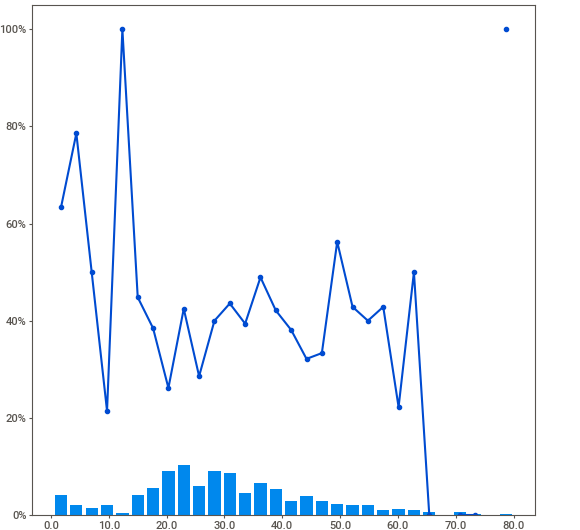
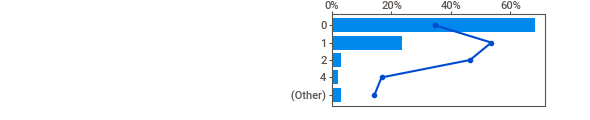
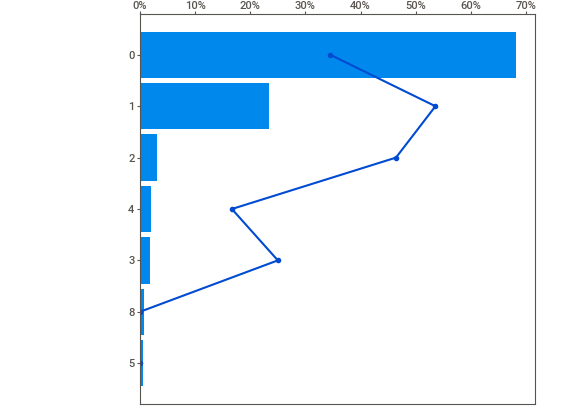
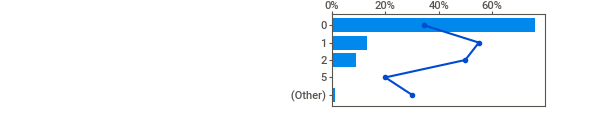
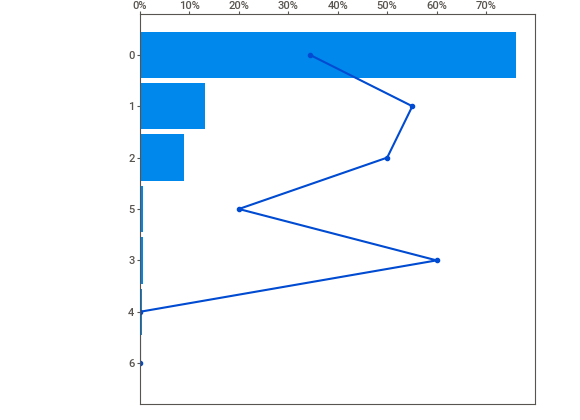
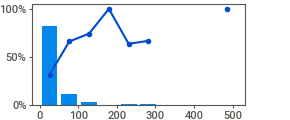
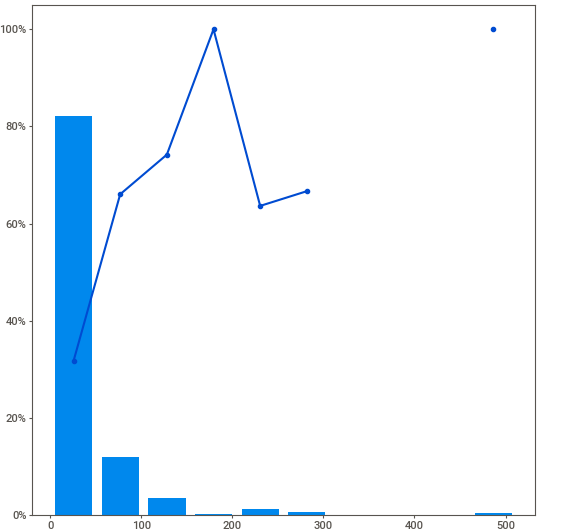
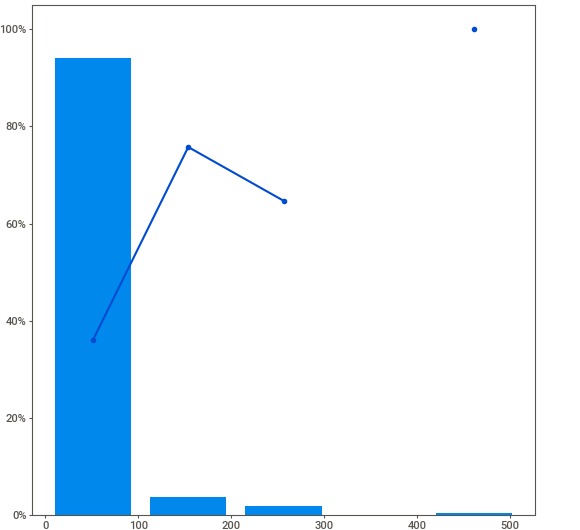
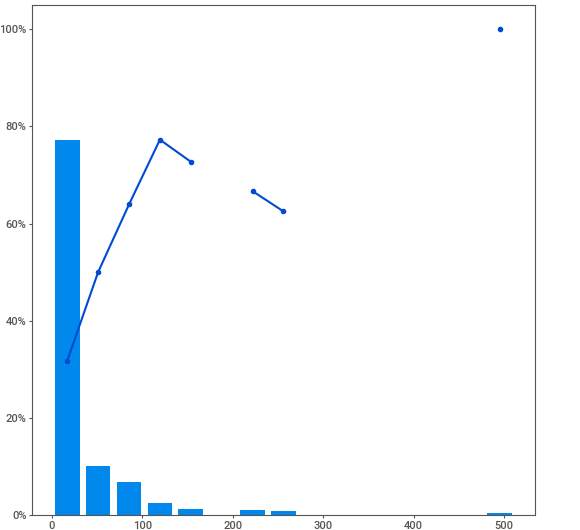
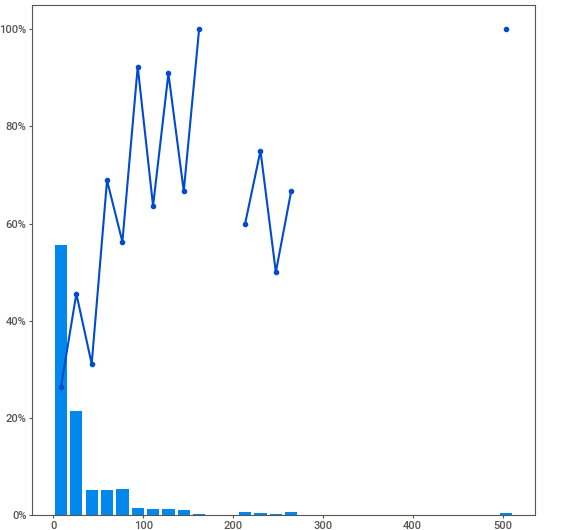
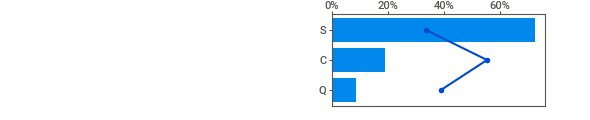
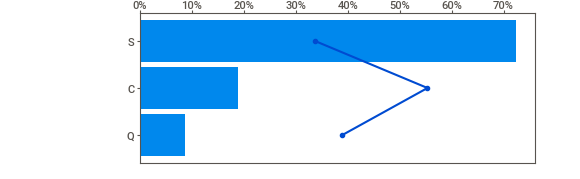
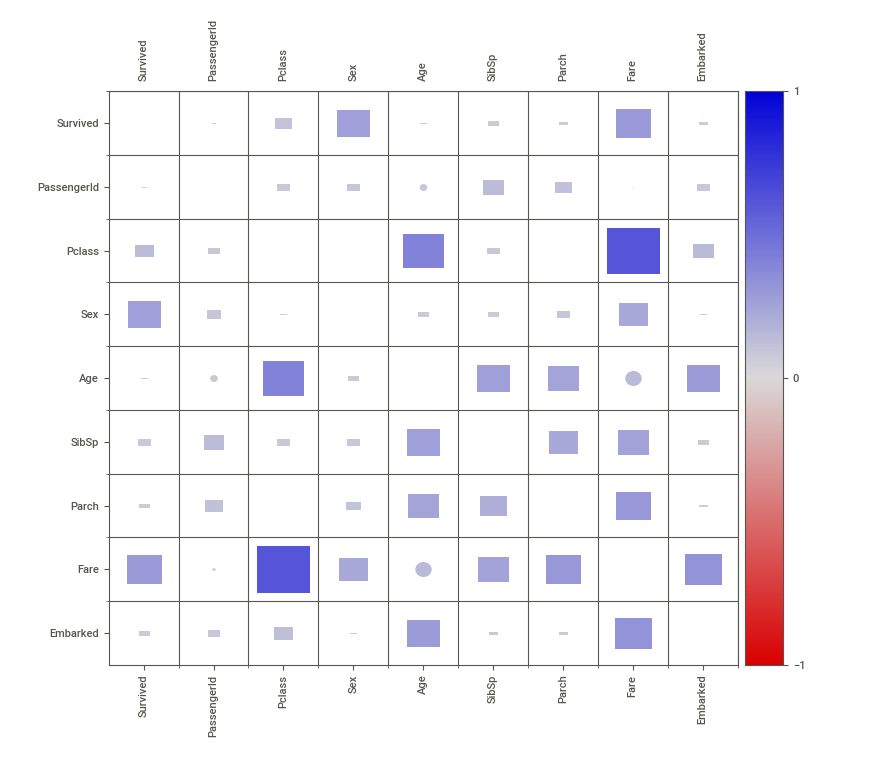
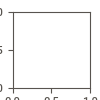

In [183]:
# instalando biblioteca de visualização

!pip install sweetviz 
import sweetviz as sv
eda = sv.analyze(source = dados, target_feat = 'Survived')
eda.show_notebook()

---
## **Pré-processamento para Machine Learning**

Em Machine Learning, é comum utilizarmos conjuntos de dados 100% numéricos para que fique adequado para qualquer modelo que se deseje utilizar. Isso significa que não pode haver dados faltantes e nem variáveis do tipo string (ou outros tipos que não sejam numéricos). 



---
### **PP1 - Descarte de variáveis não importantes**

In [184]:
dados.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [185]:
dados.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


---
### **PP2 - Verificação de dados faltantes**

In [186]:
dados.isnull().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

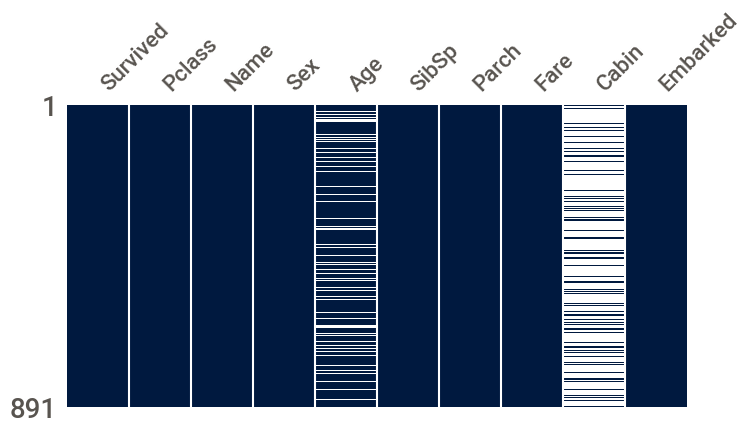

In [187]:
import missingno as missing
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

In [188]:
dados.drop(['Cabin'], axis = 1, inplace = True)

In [189]:
med_age = dados['Age'].mean() 
moda_emb = dados['Embarked'].mode()[0]

In [190]:
dados['Age'] = dados['Age'].fillna(med_age) 
dados['Embarked'] = dados['Embarked'].fillna(moda_emb)
    

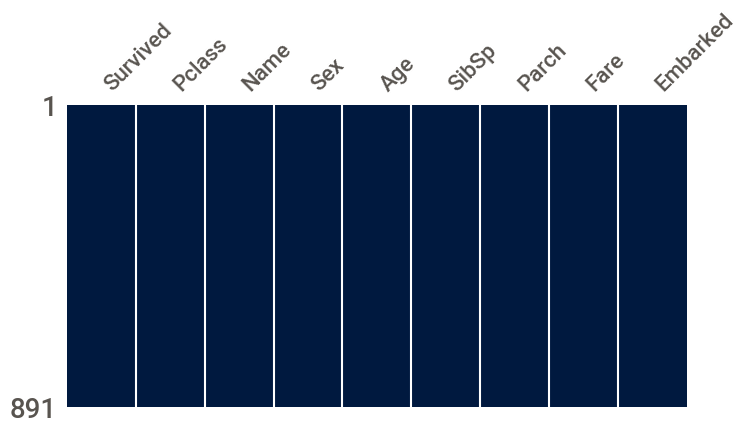

In [191]:
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

In [192]:
dados.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

---
### **PP3 - Categorização de variáveis continuas**

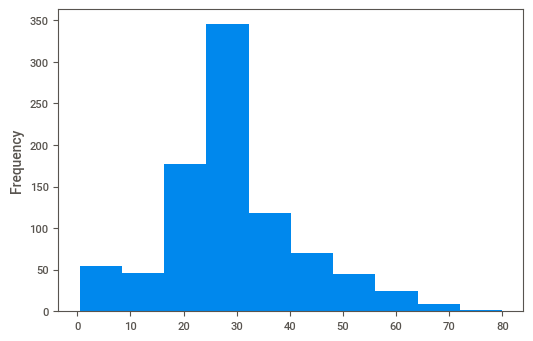

In [193]:
dados['Age'].plot(kind = 'hist');

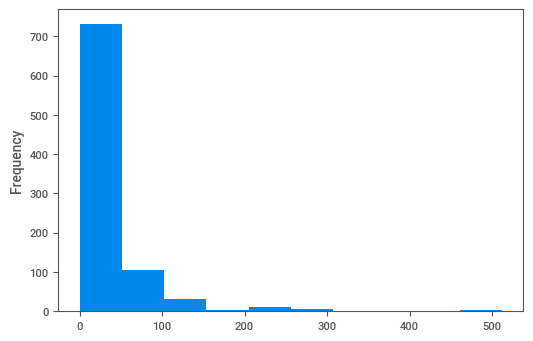

In [194]:
dados['Fare'].plot(kind = 'hist');

---
### **PP7 - Remoção de Outliers**

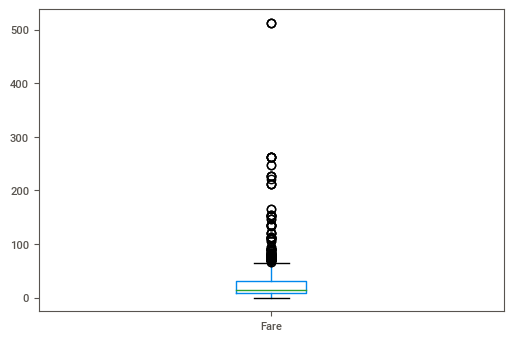

In [195]:
dados['Fare'].plot(kind = 'box');

In [196]:
top = dados['Fare'].quantile(0.975)

In [197]:
dados.loc[dados['Fare'] > top, 'Fare'] = top

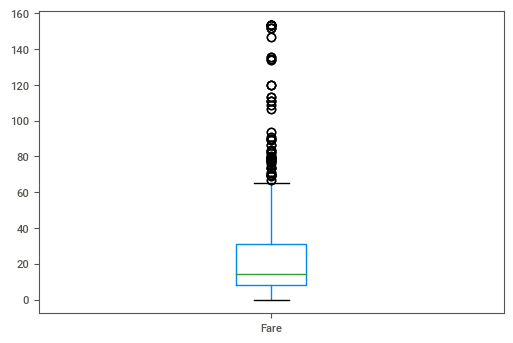

In [198]:
dados['Fare'].plot(kind = 'box');

---
### **PP6 - Escala das Variáveis Contínuas**

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#opção 1 - Padronização
#dados[['Age', 'Fare']] = sc.fit_transform(dados[['Age', 'Fare']])

#opção 2 - Normalização
dados['Age'] = dados['Age']/100
dados['Fare'] = dados['Fare']/max(dados['Fare'])

In [201]:
dados.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,0.220000,1,0,0.047243,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.380000,1,0,0.464500,C
2,1,3,"Heikkinen, Miss. Laina",female,0.260000,0,0,0.051641,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.350000,1,0,0.346013,S
4,0,3,"Allen, Mr. William Henry",male,0.350000,0,0,0.052456,S
5,0,3,"Moran, Mr. James",male,0.296991,0,0,0.055116,Q
6,0,1,"McCarthy, Mr. Timothy J",male,0.540000,0,0,0.337949,S
7,0,3,"Palsson, Master. Gosta Leonard",male,0.020000,3,1,0.137330,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.270000,0,2,0.072547,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.140000,1,0,0.195949,C


In [208]:
dados['Name'][1].split(', ')[1].split('.')[0]

'Mrs'

---
### **PP8 - Engenharia de Variáveis**

In [209]:
# tranformação de variavel: pegar apenas o titulo presente no nome

def aux(x):
    return x.split(', ')[1].split('. ')[0]

dados['Titulo'] = dados['Name'].apply(aux)

dados.drop(['Name'], axis = 1, inplace = True)

dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulo
0,0,3,male,0.22,1,0,0.047243,S,Mr
1,1,1,female,0.38,1,0,0.464500,C,Mrs
2,1,3,female,0.26,0,0,0.051641,S,Miss
3,1,1,female,0.35,1,0,0.346013,S,Mrs
4,0,3,male,0.35,0,0,0.052456,S,Mr


In [210]:
# variavel parch e sibsb
dados['Familia'] = dados['SibSp'] + dados['Parch'] + 1 

def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

dados['FamiliaTipo'] = dados['Familia'].apply(aux) 

dados.drop(['Familia', 'Parch', 'SibSp'], axis = 1, inplace = True)

dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,0,3,male,0.22,0.047243,S,Mr,Pequena
1,1,1,female,0.38,0.464500,C,Mrs,Pequena
2,1,3,female,0.26,0.051641,S,Miss,Sozinho
3,1,1,female,0.35,0.346013,S,Mrs,Pequena
4,0,3,male,0.35,0.052456,S,Mr,Sozinho


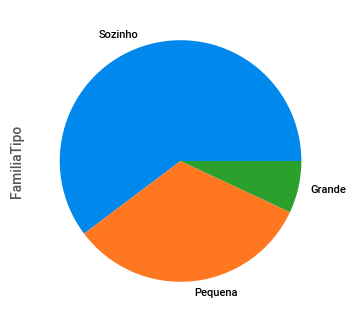

In [212]:
dados['FamiliaTipo'].value_counts().plot(kind = 'pie');

---
### **PP4 - Agrupamento de Categorias**

In [215]:
dados['Titulo'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Outros     27
Name: Titulo, dtype: int64

In [214]:
def aux(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Outros'

dados['Titulo'] = dados['Titulo'].apply(aux)
dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,0,3,male,0.22,0.047243,S,Mr,Pequena
1,1,1,female,0.38,0.464500,C,Mrs,Pequena
2,1,3,female,0.26,0.051641,S,Miss,Sozinho
3,1,1,female,0.35,0.346013,S,Mrs,Pequena
4,0,3,male,0.35,0.052456,S,Mr,Sozinho


---
### **PP5 - Dummyficação de Variáveis**

In [216]:
variaveis_cat = ['Pclass', 'Sex', 'Embarked', 'Titulo', 'FamiliaTipo']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

dados.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0,0.22,0.047243,0,1,1,0,1,0,1,0,0,1,0
1,1,0.38,0.464500,0,0,0,0,0,0,0,1,0,1,0
2,1,0.26,0.051641,0,1,0,0,1,1,0,0,0,0,1
3,1,0.35,0.346013,0,0,0,0,1,0,0,1,0,1,0
4,0,0.35,0.052456,0,1,1,0,1,0,1,0,0,0,1


---
## **Seleção de Variáveis**

### **O Random Forest como modelo base**

O Random Forest, assim como os demais modelos baseados em árvores de decisão, possui um output interessante, chamado **feature importance**. É um atributo que nos informa quais variáveis são mais importantes para o modelo. Dessa maneira, é possível fazer uma seleção das variáveis mais importantes para utilizar em um modelo final. 

In [217]:
from sklearn.ensemble import RandomForestClassifier 

In [218]:
X = dados.drop('Survived', axis = 1)
y = dados['Survived']

modelo_base = RandomForestClassifier(max_depth = 3) 
modelo_base.fit(X, y) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
modelo_base.feature_importances_

array([0.0422282 , 0.10120954, 0.00941093, 0.0944351 , 0.2554248 ,
       0.00341888, 0.01674951, 0.07102448, 0.25559291, 0.08714419,
       0.00217698, 0.04980264, 0.01138184])

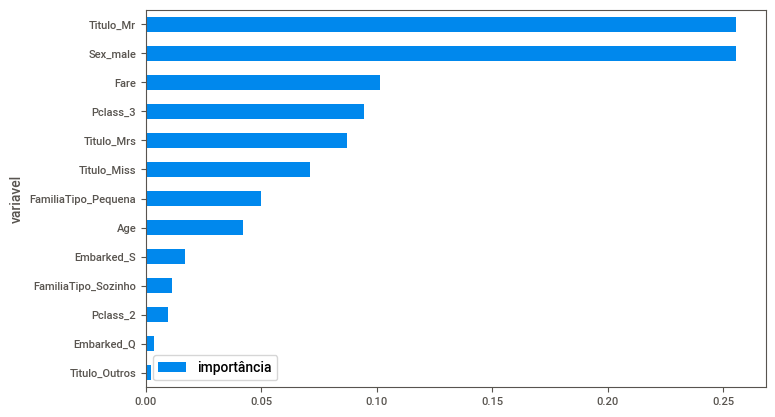

In [221]:
variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importância'] = modelo_base.feature_importances_
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8, 5));

### **Seleção de variáveis mais importantes com a função SelectFromModel, do scikit-learn.**

In [222]:
import numpy as np
from sklearn.feature_selection import SelectFromModel

seletor = SelectFromModel(modelo_base, prefit = True, max_features = 6, threshold = -np.inf)
X6 = seletor.transform(X)
print(X6.shape) 

seletor = SelectFromModel(modelo_base, prefit = True, max_features = 8, threshold = -np.inf)
X8 = seletor.transform(X)
print(X8.shape) 
 

(891, 6)
(891, 8)


In [223]:
X.shape

(891, 13)

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [225]:
def MachineLearning(X,y):

    #X = dados.drop('Exited', axis = 1)
    #y = dados['Exited']

    lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
    nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

    lista_de_modelos = [LogisticRegression(),
                            DecisionTreeClassifier(max_depth = 3),
                            DecisionTreeClassifier(max_depth = 5),
                            DecisionTreeClassifier(max_depth = 7),
                            KNeighborsClassifier(n_neighbors = 5),
                            KNeighborsClassifier(n_neighbors = 15),
                            KNeighborsClassifier(n_neighbors = 25),
                            BaggingClassifier(),
                            RandomForestClassifier(n_estimators=50, max_depth = 5),
                            RandomForestClassifier(n_estimators=50, max_depth = 7),
                            RandomForestClassifier(n_estimators=100, max_depth = 5),
                            RandomForestClassifier(n_estimators=100, max_depth = 7)]

    nome_dos_modelos = ['Regressão Logística',
                            'Árvore (prof = 3)',
                            'Árvore (prof = 5)',
                            'Árvore (prof = 7)',
                            '5-NN',
                            '15-NN',
                            '25-NN',
                            'Bagging',
                            'Random Forest (arvs = 50, prof = 5)',
                            'Random Forest (arvs = 50, prof = 7)',
                            'Random Forest (arvs = 100, prof = 5)', 
                            'Random Forest (arvs = 100, prof = 7)']

    resultados0 = {}

    validacao = StratifiedKFold(n_splits = 10)


    for i in range(len(lista_de_modelos)):
        print('Rodando modelo: ' + nome_dos_modelos[i])
        accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

        acc = accs_vc['test_accuracy'].mean()
        sen = accs_vc['test_recall'].mean()
        vpp = accs_vc['test_precision'].mean()
        bac = accs_vc['test_balanced_accuracy'].mean()
        f1s = accs_vc['test_f1'].mean()

        resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
        
    resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

    return resultados


In [226]:
MachineLearning(X, y)

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


,acurácia,sensibilidade,precisão,eficiência,f1-score
Regressão Logística,0.824931,0.742521,0.789830,0.761769,0.809324
Árvore (prof = 3),0.826042,0.736471,0.795892,0.761614,0.809043
Árvore (prof = 5),0.823895,0.725378,0.795061,0.755270,0.805265
Árvore (prof = 7),0.830599,0.731176,0.807302,0.764952,0.811834
5-NN,0.813758,0.725294,0.778202,0.747637,0.797058
15-NN,0.821573,0.707647,0.808834,0.749924,0.800052
25-NN,0.808090,0.631849,0.829317,0.713658,0.774897
Bagging,0.811498,0.728319,0.769615,0.744672,0.795877
"Random Forest (arvs = 50, prof = 5)",0.828290,0.695882,0.828621,0.753137,0.803295
"Random Forest (arvs = 50, prof = 7)",0.832797,0.701765,0.836229,0.759829,0.808054


In [227]:
MachineLearning(X6, y)

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


,acurácia,sensibilidade,precisão,eficiência,f1-score
Regressão Logística,0.788976,0.730840,0.722228,0.724982,0.777945
Árvore (prof = 3),0.820437,0.762941,0.768179,0.762562,0.809501
Árvore (prof = 5),0.814919,0.757815,0.759535,0.756869,0.804227
Árvore (prof = 7),0.820487,0.745798,0.778554,0.760369,0.806401
5-NN,0.811573,0.722269,0.778059,0.745215,0.794653
15-NN,0.818240,0.707815,0.795421,0.747508,0.797460
25-NN,0.796854,0.643361,0.788059,0.706125,0.767910
Bagging,0.823808,0.742689,0.788829,0.761825,0.808483
"Random Forest (arvs = 50, prof = 5)",0.824956,0.725210,0.800854,0.759315,0.806107
"Random Forest (arvs = 50, prof = 7)",0.820487,0.713697,0.798220,0.751200,0.800350


In [228]:
MachineLearning(X8, y)

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


,acurácia,sensibilidade,precisão,eficiência,f1-score
Regressão Logística,0.784544,0.701849,0.727300,0.712391,0.768904
Árvore (prof = 3),0.820437,0.762941,0.768179,0.762562,0.809501
Árvore (prof = 5),0.818290,0.731176,0.780217,0.751745,0.801800
Árvore (prof = 7),0.813733,0.734202,0.770771,0.749338,0.798784
5-NN,0.821610,0.748655,0.781014,0.762380,0.807829
15-NN,0.814806,0.698571,0.793884,0.739936,0.792821
25-NN,0.802459,0.722269,0.753139,0.734069,0.787363
Bagging,0.811486,0.716303,0.775910,0.741901,0.793488
"Random Forest (arvs = 50, prof = 5)",0.828265,0.716134,0.813868,0.758555,0.807040
"Random Forest (arvs = 50, prof = 7)",0.836180,0.716555,0.833471,0.767472,0.813597


## **Tunagem de Hiperparâmetros** 

Tunagem de Hiperparâmetros nada mais é do que encontrar qual a melhor combinação de valores que passamos aos algoritmos no momento de seu treinamento. Algums modelos tem poucos hiperparâmetros que se deseja tunar, outros têm muitos. 

Para fazer essa checagem, testa-se através de um método de validação selecionado, o desempenho de cada possível combinação de hiperparâmetros apresentado. Logo se vê que se necessita de bastante poder computacional para realizar tal checagem. 

Na função abaixo, temos um programa que realiza a busca pelos hiperparâmetros. Veja que ela utiliza dois tipos de hipertunagem de parâmetros, o tipo = 'tudo', que testa todo espaço de parâmetros apresentado (custoso, lento, preciso), e o tipo = 'aleatorio', que testa apenas uma amostra aleatória do espaço de parâmetros (menos custoso, rápido, menos preciso). 

Nesse exemplo, estamos procurando qual é o melhor K para o KNN. Varremos todas as possibilidades de 1 até 49, de 2 em 2, o que totaliza 25 modelos diferentes para se testar. E em cada modelo, é aplicada a estratégia de validação corresponde, muitas vezes envolvendo várias iterações do K-Fold.

Devemos escolher entre as duas estratégias levando em consideração o recurso computacional que temos em mão e o tempo que podemos dispor para encontrar a solução. 

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [229]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [236]:
modelo = KNeighborsClassifier()
        
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

parametros = { 'n_neighbors' : np.arange(1, 100, 1) }

grid_search = GridSearchCV(modelo, param_grid = parametros,
                                   scoring = 'accuracy', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_jobs = -1)

grid_search.fit(X, y)



Fitting 30 folds for each of 99 candidates, totalling 2970 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2926 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 2970 out of 2970 | elapsed:   22.6s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre

In [240]:
grid_search.best_score_

0.823391593841032

In [241]:
grid_search.cv_results_['mean_test_score']

array([0.76765293, 0.7874948 , 0.8099459 , 0.81330004, 0.81255514,
       0.81329588, 0.81741157, 0.80731586, 0.80844361, 0.81029963,
       0.81704536, 0.81255098, 0.81405327, 0.81366209, 0.81743238,
       0.81218893, 0.81143987, 0.80059093, 0.80022056, 0.80432792,
       0.80358302, 0.81104453, 0.80918851, 0.81069496, 0.81291719,
       0.81330836, 0.81404911, 0.8133042 , 0.81068248, 0.81106117,
       0.81179359, 0.81180608, 0.81404078, 0.81067   , 0.81553475,
       0.81403662, 0.82189347, 0.82039534, 0.82189347, 0.82039534,
       0.82339159, 0.82301706, 0.82301706, 0.82339159, 0.8215231 ,
       0.82264669, 0.82227216, 0.82302122, 0.82189763, 0.82227216,
       0.82227632, 0.82302538, 0.82114856, 0.82227216, 0.82077819,
       0.82040366, 0.82077819, 0.8189097 , 0.81779026, 0.81779442,
       0.8159176 , 0.81629213, 0.81516854, 0.81553891, 0.81554307,
       0.81628797, 0.81554307, 0.8159176 , 0.81479817, 0.81667083,
       0.81630046, 0.81817312, 0.81667083, 0.81779442, 0.81554

In [242]:
random_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                   scoring = 'accuracy', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_iter = 10,
                                   n_jobs = -1)

random_search.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,

In [243]:
random_search.cv_results_['mean_test_score']

array([0.81404494, 0.81851852, 0.81292967, 0.81068664, 0.82002081,
       0.82151893, 0.8211444 , 0.81628797, 0.80808156, 0.82151893])

In [245]:
random_search.best_score_

0.8215189346650021

---

In [258]:
def Tunagem(modelo, treino, targets, parametros, tipo = 'grid'):
 
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 50, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor


In [254]:

parametros = {   
                 'n_neighbors' : np.arange(1, 50, 2)
                 }
modelo = KNeighborsClassifier()

knn = Tunagem(modelo, X, y, parametros, tipo = 'grid')


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



Acuracia: 0.8238
Melhores parâmetros: {'n_neighbors': 41}



[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.9s finished


In [255]:
parametros = {   
              'max_depth' : np.arange(1,11), 
              'min_samples_split': np.arange(2,12),
              'min_samples_leaf': np.arange(1,11),
                 }

modelo = DecisionTreeClassifier()

arvore = Tunagem(modelo, X, y, parametros, tipo = 'grid')
arvore

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   16.7s



Acuracia: 0.8441
Melhores parâmetros: {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 11}



[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   30.1s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [259]:
parametros = {   
                 'max_depth' : [2, 4, 6, 8, 10],
                 'n_estimators': [50, 100, 150],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5],
                 'bootstrap': [True, False]
                 }

modelo = RandomForestClassifier()

rf = Tunagem(modelo, X, y, parametros, tipo = 'random')
rf

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   42.2s



Acuracia: 0.8440
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   55.5s finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

---
## **Exercícios**

- Use diferentes estratégias de imputação de dados
- Faça a tunagem de hiperparâmetros para cada proposta de pré-processamento
- Encontre a melhor modelagem possível para os dados de Churn
- Encontre a melhor modelagem possível para os dados do Titanic


In [ ]:
# variavel idade
# usar quando tiver tudo numerico

from sklearn.impute import KNNImputer 
imputador = KNNImputer()
